In [ ]:
!pip install nltk

In [ ]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
!cp '/content/drive/MyDrive/Dataset/Sentiment/test.csv.zip' .

In [ ]:
!unzip -q /content/test.csv.zip

In [ ]:
!cp '/content/drive/MyDrive/Dataset/Sentiment/train.csv (1).zip' .

In [ ]:
!unzip -q /content/train.csv.zip

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:
train.shape

(31962, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


**Plot the distribution of train and test dataset  tweets**

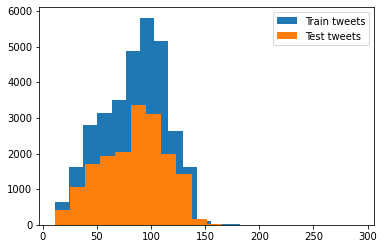

In [ ]:
length_of_train_dataset = train['tweet'].str.len()
length_of_test_dataset = test['tweet'].str.len()
plt.hist(length_of_train_dataset, bins=20,label="Train tweets")
plt.hist(length_of_test_dataset, bins=20,label="Test tweets")
plt.legend() 
plt.show()

**Combining Both dataframe**

In [ ]:
combine=train.append(test,ignore_index=True) #train and test dataset are combined
combine.shape

(49159, 3)

In [ ]:
def remove_pattern(input_text,pattern):
    r= re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

In [ ]:

combine['cleaned_username_tweets'] = np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*") 
combine.head()

,id,label,tweet,cleaned_username_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
combine['cleaned_username_tweets'] = combine['cleaned_username_tweets'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

,id,label,tweet,cleaned_username_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [ ]:
combine['cleaned_username_tweets'] = combine['cleaned_username_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
#removing words whose length is less than 3

In [ ]:
tokenized_tweet = combine['cleaned_username_tweets'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: cleaned_username_tweets, dtype: object

**Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) #it will stemmatized all words in tweet

In [ ]:
tokenized_tweet[:2]

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
Name: cleaned_username_tweets, dtype: object

In [ ]:
#now let's combine these tokens back

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
combine['cleaned_username_tweets'] = tokenized_tweet

In [ ]:
combine[:3]

,id,label,tweet,cleaned_username_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti


In [ ]:
all_words = ' '.join([text for text in combine['cleaned_username_tweets']])


In [ ]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

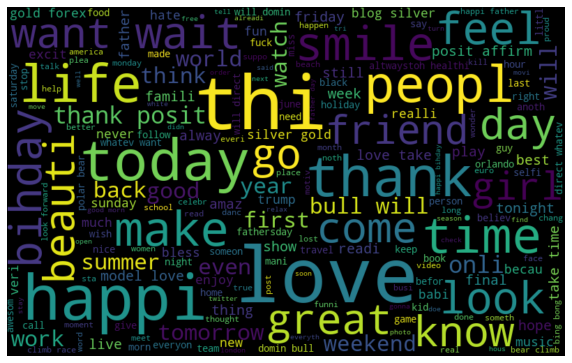

In [ ]:
#creating the word Clolud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

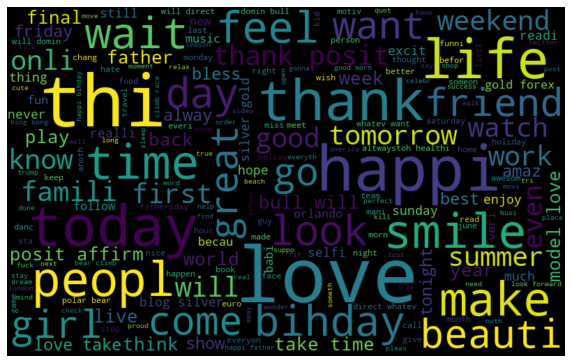

In [ ]:
normal_words= ' '.join([text for text in combine['cleaned_username_tweets'][combine['label']==0.0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

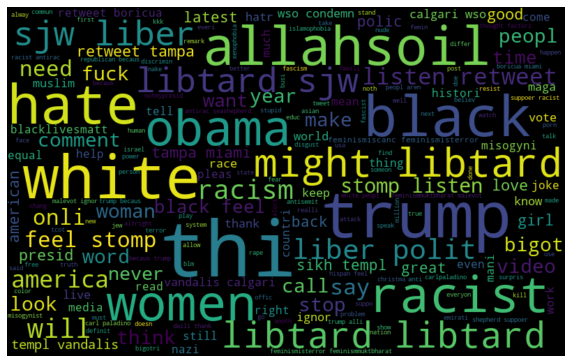

In [ ]:
negative_words= ' '.join([text for text in combine['cleaned_username_tweets'][combine['label']==1.0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#collect all hashtags

def hashtag_extract(x):
    hashtags=[]
    for i in x: #loop over words contain in tweet
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [ ]:
#extracting hashtags from non racist tweets
ht_regular = hashtag_extract(combine['cleaned_username_tweets'][combine['label']==0])
#extracting hashtags from racist tweets
ht_negative=hashtag_extract(combine['cleaned_username_tweets'][combine['label']==1])
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

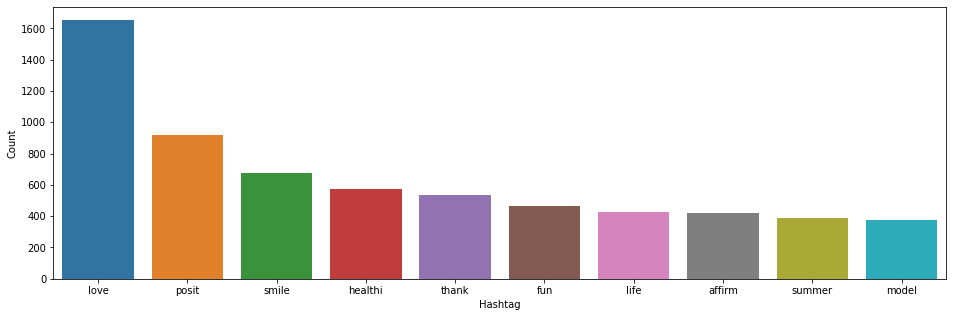

In [ ]:
a = nltk.FreqDist(ht_regular)
viz_d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
viz_d = viz_d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=viz_d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

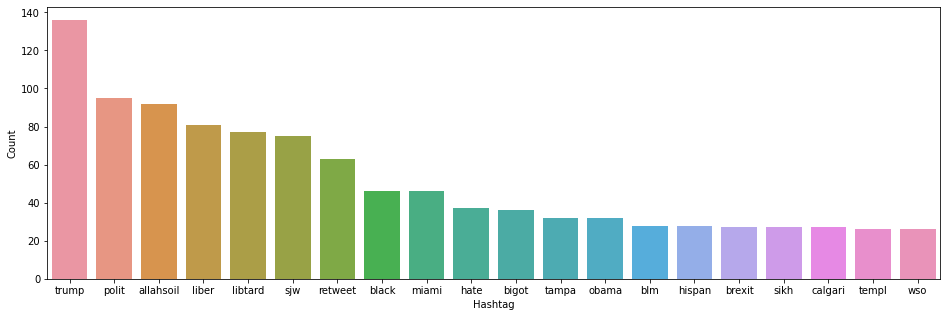

In [ ]:
racist_tweets = nltk.FreqDist(ht_negative)
viz_d2 = pd.DataFrame({'Hashtag': list(racist_tweets.keys()),'Count': list(racist_tweets.values())}) #count number of occurrence of particular word

#selecting top 20 frequent  hashtags

viz_d2 = viz_d2.nlargest(columns = "Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=viz_d2, x="Hashtag",y="Count")
plt.show()

**Converting Preprcesseddata into features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
#Bag-of-words

#Each row in matrix M contains the frequency of tokens(words) in the document D(i)

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(combine['cleaned_username_tweets']) # tokenize and build vocabulary
bow.shape

(49159, 1000)

In [ ]:
combine.isnull().sum()

id                             0
label                      17197
tweet                          0
cleaned_username_tweets        0
dtype: int64

In [ ]:
combine=combine.fillna(0) #replace all null values by 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, combine['label'],
                                                    test_size=0.2, random_state=69)


In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (39327, 1000)
X_test_shape :  (9832, 1000)
y_train_shape :  (39327,)
y_test_shape :  (9832,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

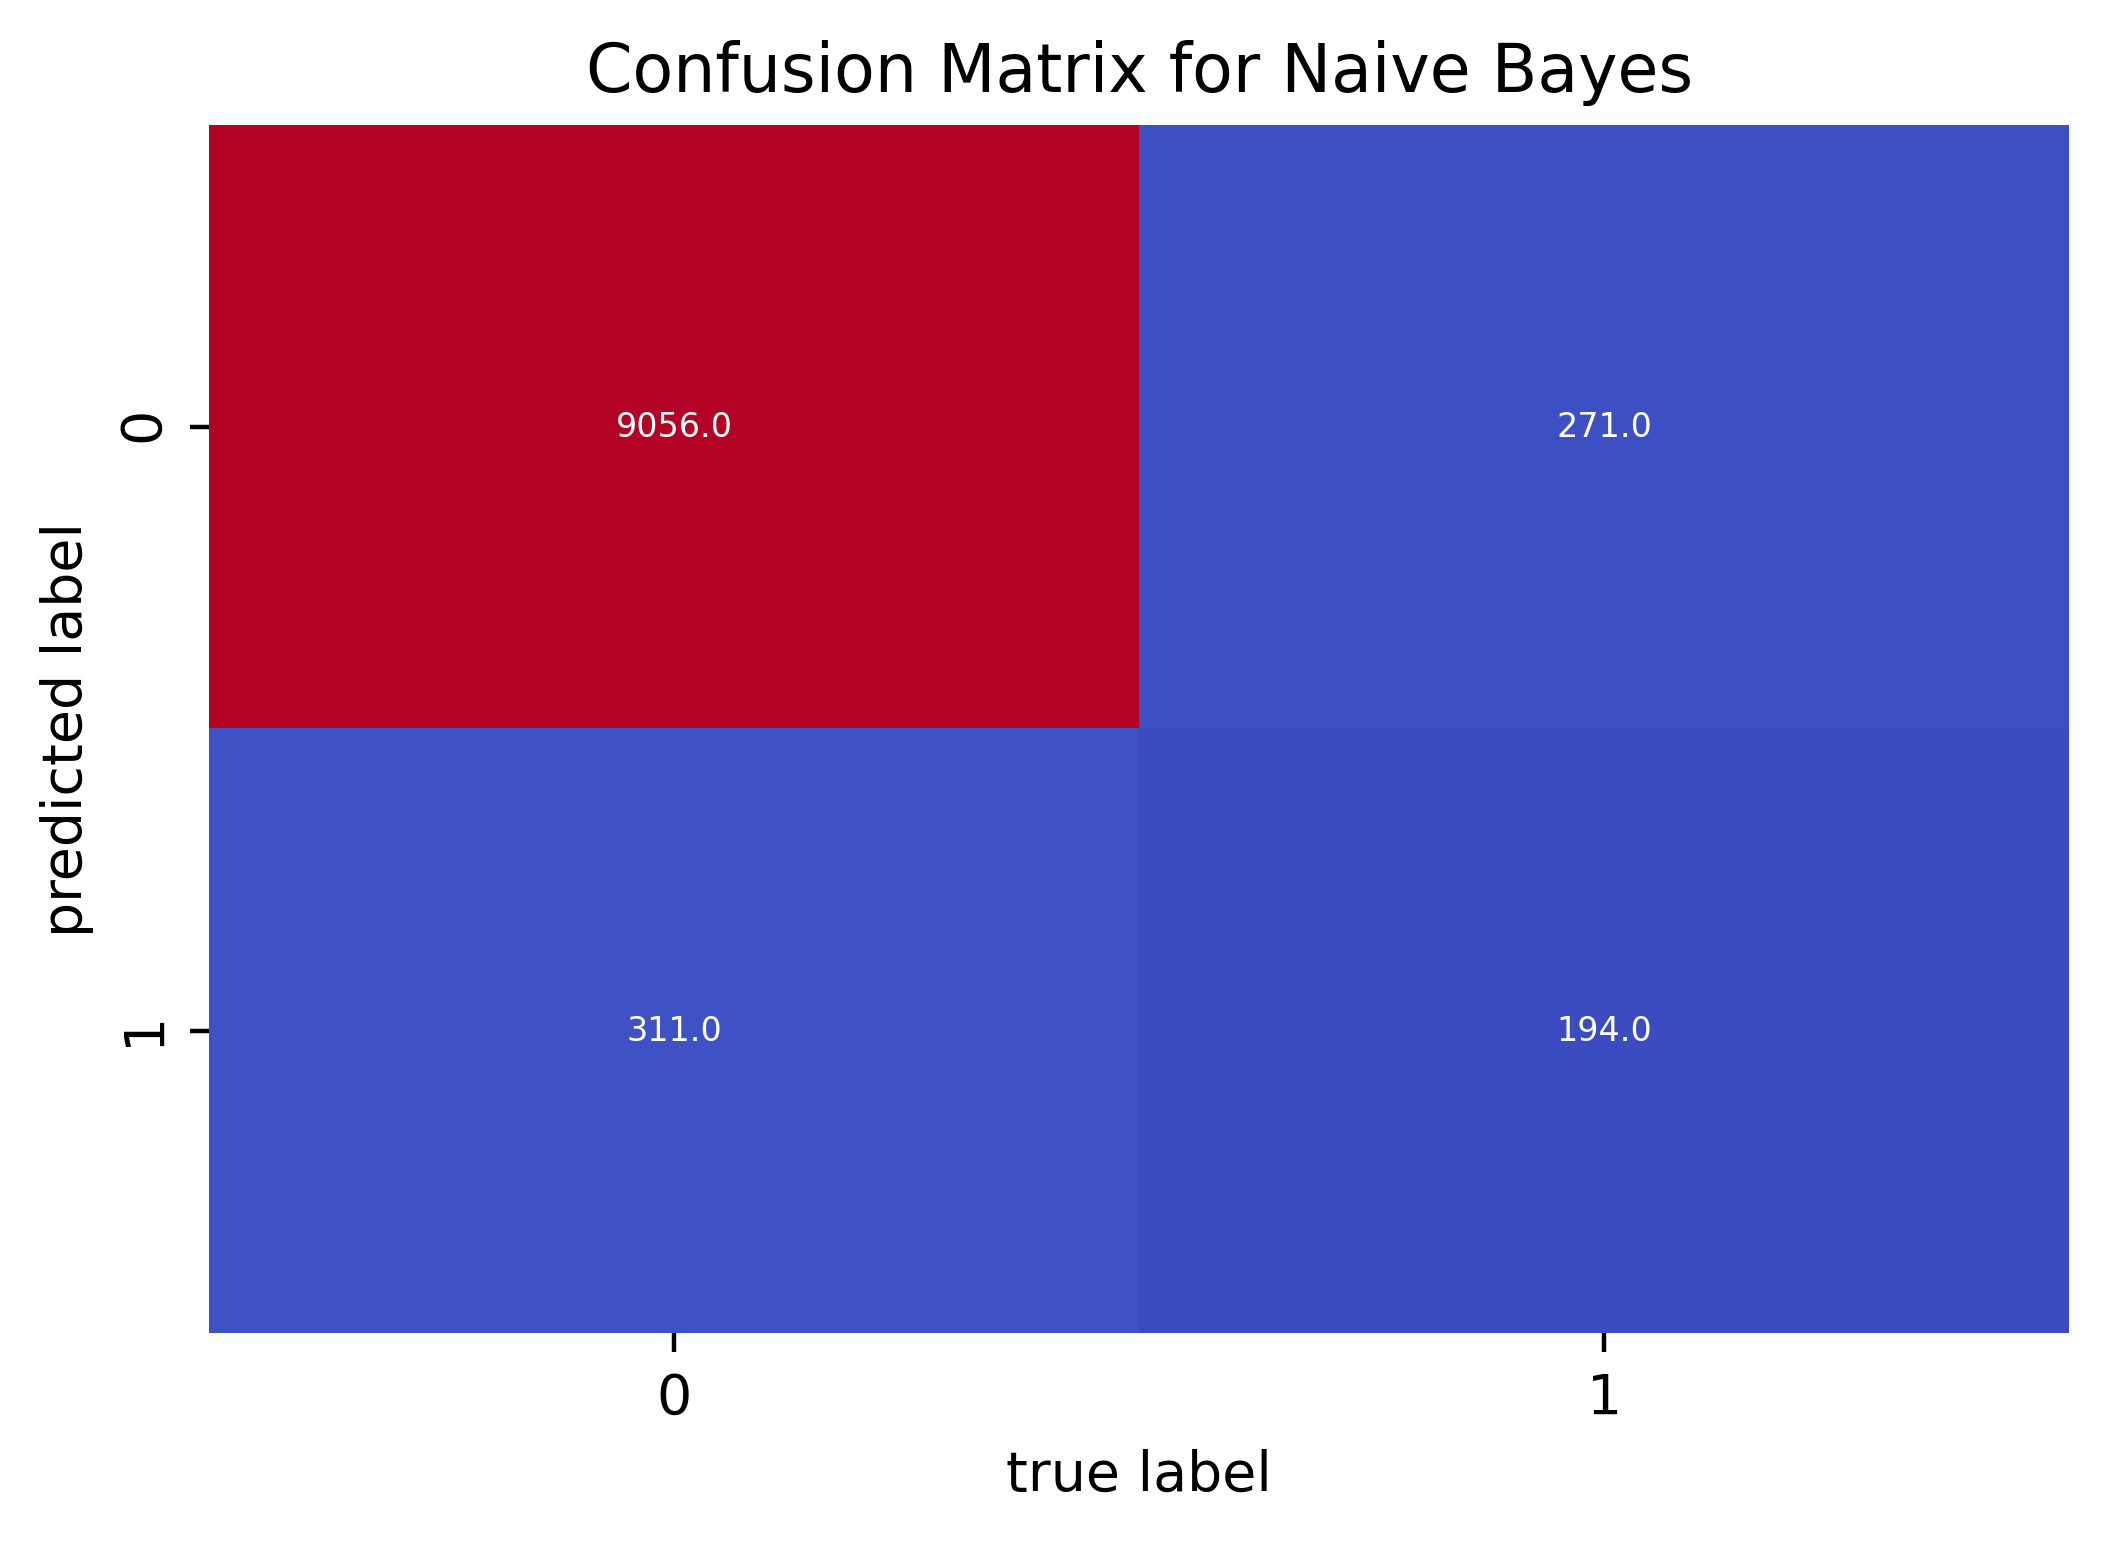

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=400)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt=".1f", cbar=False,cmap='coolwarm',annot_kws={'size':6})

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9408055329536208


In [ ]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
#model_naive.predict(X_test[2])

array([0.])